##### The data contains the following columns:
- 'Avg. Area Income': Avg. Income of residents of the city house is located in.
- 'Avg. Area House Age': Avg Age of Houses in same city 'Avg. ‘
- 'Area Number of Rooms': Avg Number of Rooms for Houses in same city 'Avg.
- 'Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city.
- 'Area Population': Population of city house is located in
- 'Price': Price that the house sold at
- 'Address': Address for the house.

In [332]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
data = pd.read_csv('USA_Housing.csv')

In [4]:
df = data.copy()

##### Data Understanding

In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
df.shape

(5000, 7)

##### Data Preparation

In [10]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [11]:
columns = df.columns
df.columns = [col.lower() for col in columns]

In [16]:
df.columns

Index(['avg. area income', 'avg. area house age', 'avg. area number of rooms',
       'avg. area number of bedrooms', 'area population', 'price', 'address'],
      dtype='object')

In [21]:
df.rename(columns = {'avg. area income':'avg_area_income', 'avg. area house age':'avg_house_age', 'avg. area number of rooms':'avg_number_rooms',
                     'avg. area number of bedrooms':'avg_number_bedrooms','area population':'area_population'}, inplace=True)

In [24]:
df.columns

Index(['avg_area_income', 'avg_house_age', 'avg_number_rooms',
       'avg_number_bedrooms', 'area_population', 'price', 'address'],
      dtype='object')

In [26]:
df.isnull().sum()

avg_area_income        0
avg_house_age          0
avg_number_rooms       0
avg_number_bedrooms    0
area_population        0
price                  0
address                0
dtype: int64

In [28]:
corr_matrix = df.corr(numeric_only=True)

In [30]:
corr_matrix

,avg_area_income,avg_house_age,avg_number_rooms,avg_number_bedrooms,area_population,price
avg_area_income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
avg_house_age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
avg_number_rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
avg_number_bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
area_population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


<Axes: >

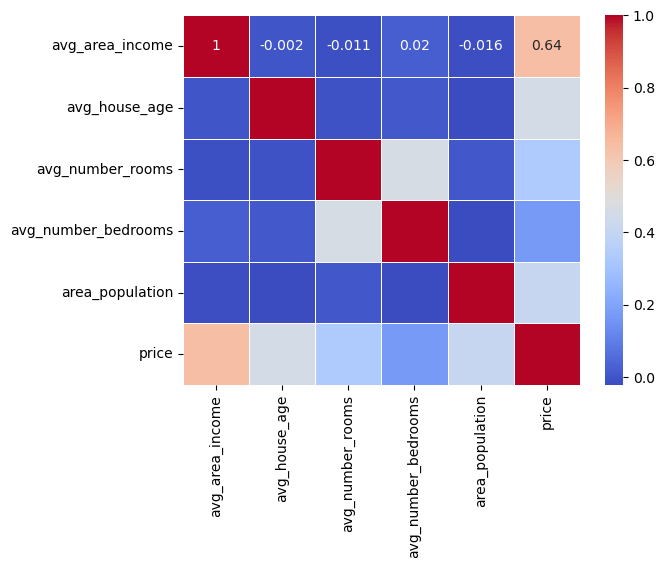

In [32]:
sns.heatmap(corr_matrix,annot=True,linewidths=0.5,cmap='coolwarm')

C:\Users\zeyne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zeyne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zeyne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zeyne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

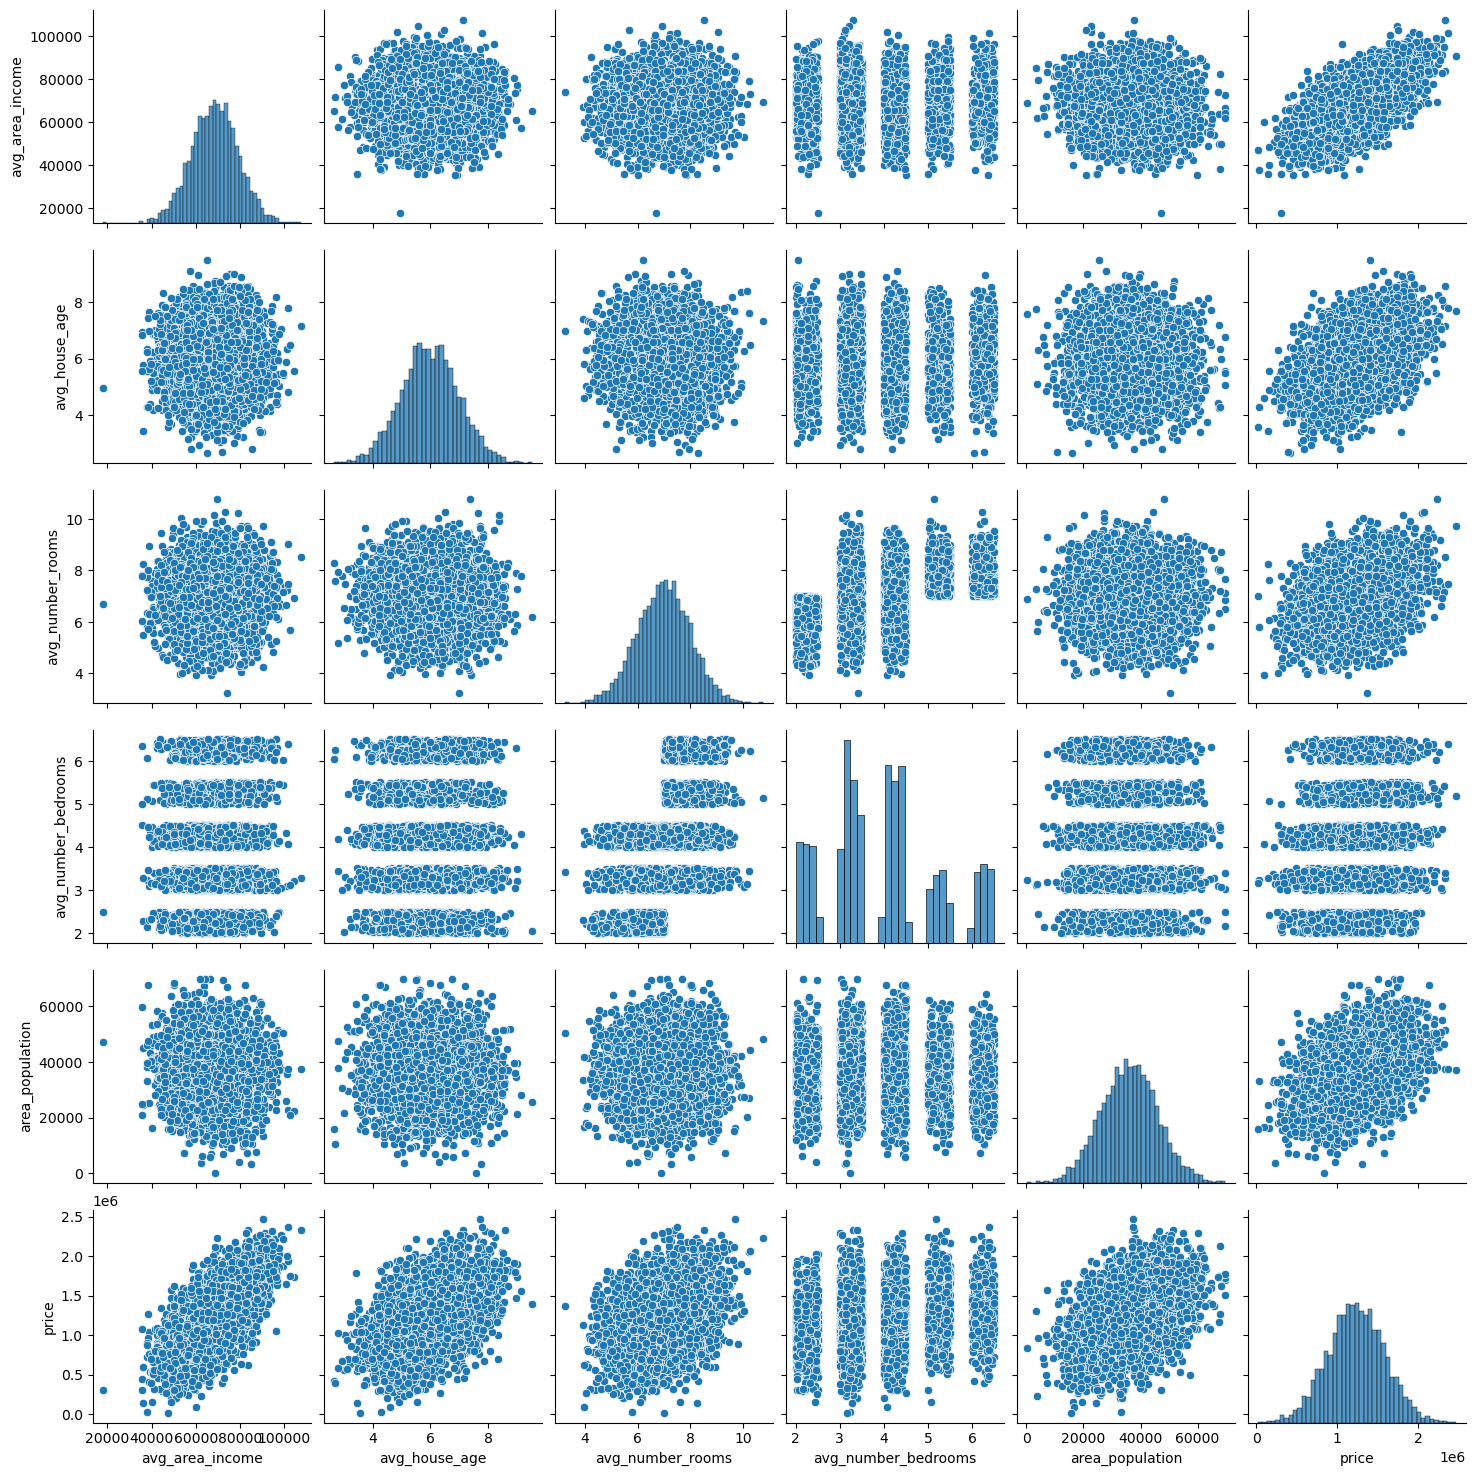

In [33]:
sns.pairplot(df)

In [35]:
features = df[['avg_area_income', 'avg_house_age', 'avg_number_rooms','avg_number_bedrooms', 'area_population']]

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.DataFrame([variance_inflation_factor(features.values,i) for i in range(features.shape[1])],index = ['avg_area_income', 'avg_house_age', 'avg_number_rooms','avg_number_bedrooms', 'area_population'])

,0
avg_area_income,29.650899
avg_house_age,27.447775
avg_number_rooms,45.257291
avg_number_bedrooms,14.537873
area_population,12.825450


In [69]:
df_final = df.copy()

In [71]:
df_final.drop(df_final[['avg_number_bedrooms']],axis = 1,inplace=True)

In [75]:
df_final_features = df_final[['avg_area_income', 'avg_house_age', 'avg_number_rooms', 'area_population']]

pd.DataFrame([variance_inflation_factor(df_final_features.values,i) for i in range(df_final_features.shape[1])],index = ['avg_area_income', 'avg_house_age', 'avg_number_rooms', 'area_population'])

,0
avg_area_income,29.632060
avg_house_age,27.446757
avg_number_rooms,32.156187
area_population,12.813187


In [79]:
df_final.corr(numeric_only=True)

,avg_area_income,avg_house_age,avg_number_rooms,area_population,price
avg_area_income,1.000000,-0.002007,-0.011032,-0.016234,0.639734
avg_house_age,-0.002007,1.000000,-0.009428,-0.018743,0.452543
avg_number_rooms,-0.011032,-0.009428,1.000000,0.002040,0.335664
area_population,-0.016234,-0.018743,0.002040,1.000000,0.408556
price,0.639734,0.452543,0.335664,0.408556,1.000000


C:\Users\zeyne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zeyne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zeyne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zeyne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

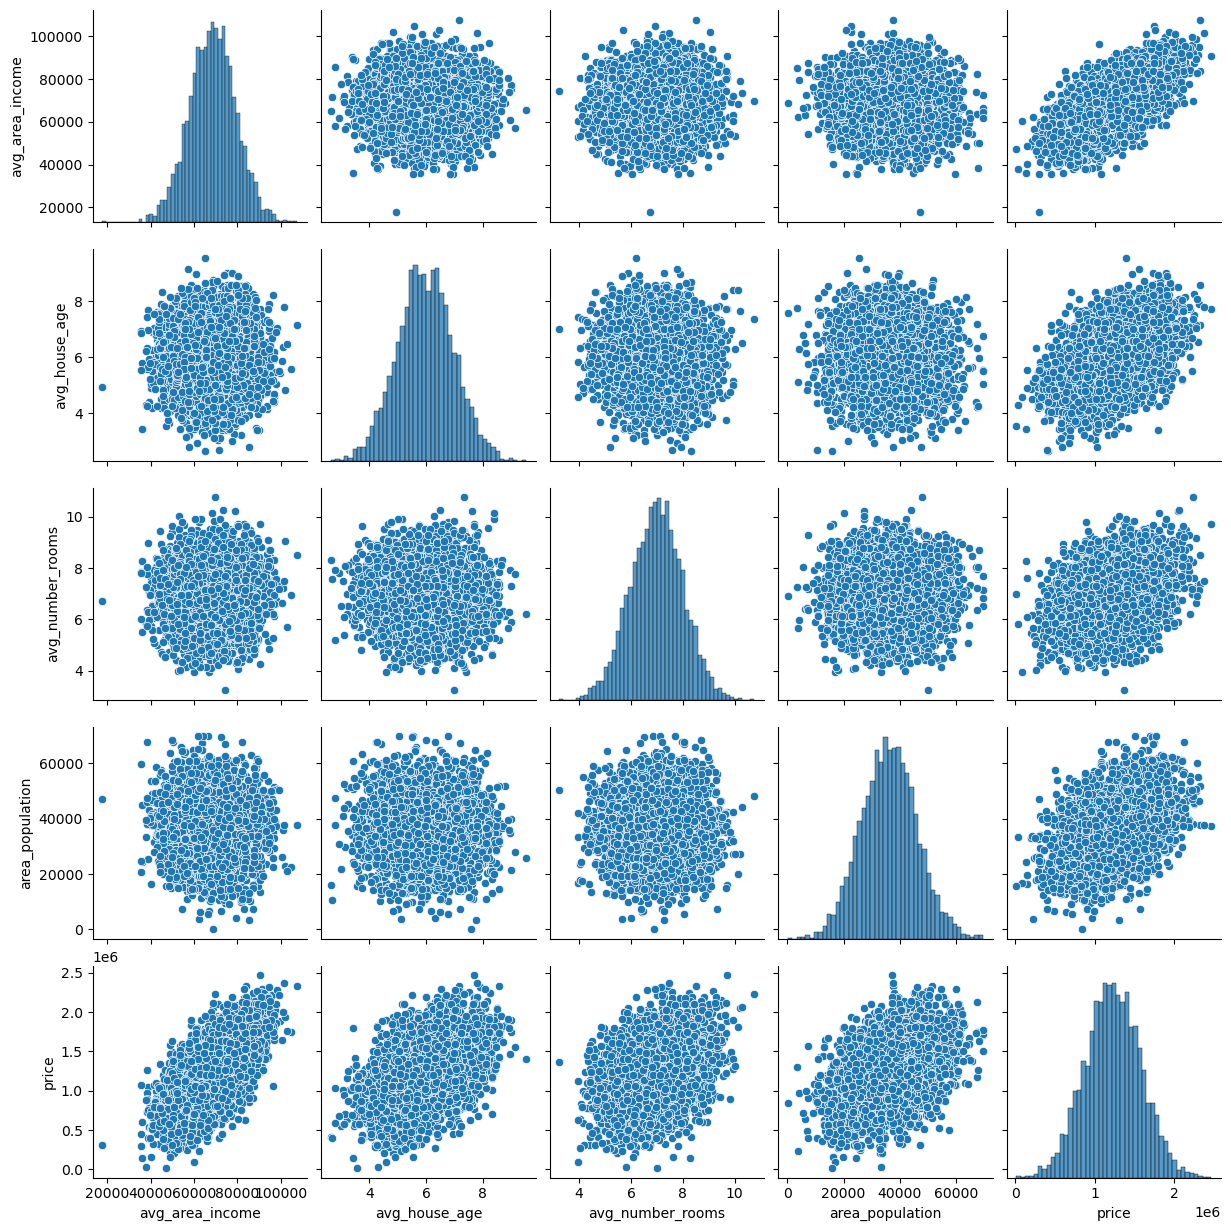

In [83]:
sns.pairplot(df_final)

##### Functions for Removing Outliers

In [270]:
def remove_outliers(data,column):
    lower,upper = quantiles(data,column)
    data.loc[(data[column] > lower) & (data[column]<upper)] 
    return data.loc[(data[column] > lower) & (data[column]<upper)]


In [272]:
def outliers(data,column):
    lower,upper = quantiles(data,column)
    return data[column].loc[(data[column] < lower) | (data[column]>upper)] 


In [274]:
def quantiles(data,column):
    q1 = np.quantile(data[column],0.25)
    q3 = np.quantile(data[column],0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return lower,upper

In [282]:
df_final = remove_outliers(df_final,'avg_area_income')

{'whiskers': [<matplotlib.lines.Line2D at 0x1bf6e769290>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf6e76a610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf6e730610>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf6e76b610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf6e76be10>],
 'means': []}

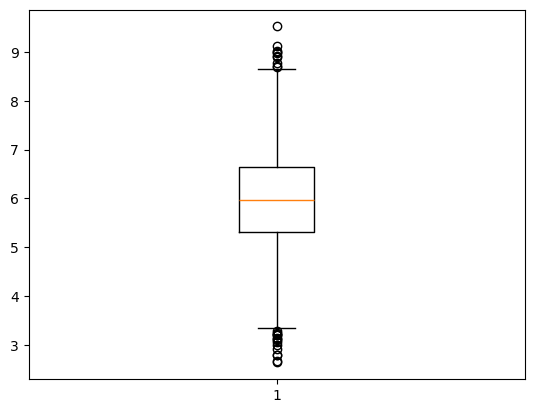

In [288]:
plt.boxplot(df_final['avg_house_age'])

In [292]:
df_final = remove_outliers(df_final, 'avg_house_age')

{'whiskers': [<matplotlib.lines.Line2D at 0x1bf6ea49690>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf6ea4a950>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf6ea48fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf6ea4b7d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf6ea5c0d0>],
 'means': []}

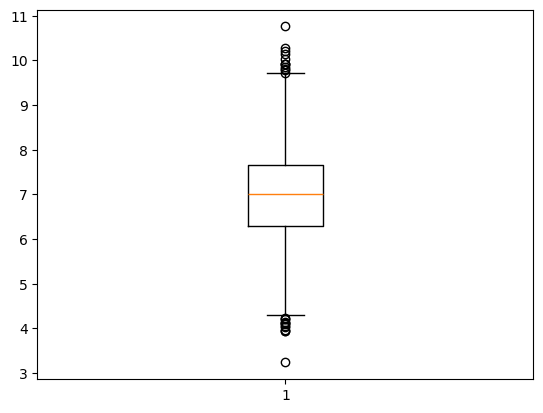

In [296]:
plt.boxplot(df_final['avg_number_rooms'])

In [300]:
df_final = remove_outliers(df_final, 'avg_number_rooms')

{'whiskers': [<matplotlib.lines.Line2D at 0x1bf6eac0490>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf6eac18d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf6eab7b50>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf6eac27d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf6eac3090>],
 'means': []}

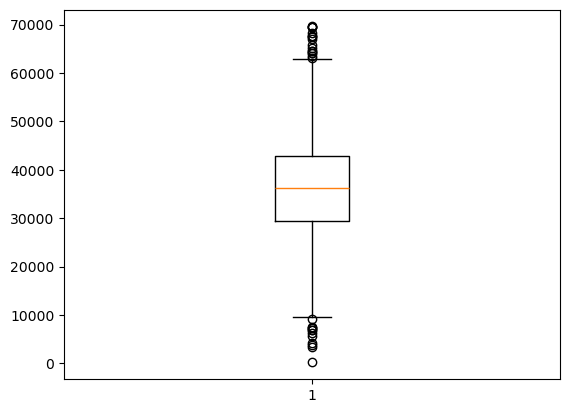

In [302]:
plt.boxplot(df_final['area_population'])

In [306]:
df_final = remove_outliers(df_final,'area_population')

C:\Users\zeyne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zeyne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zeyne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zeyne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

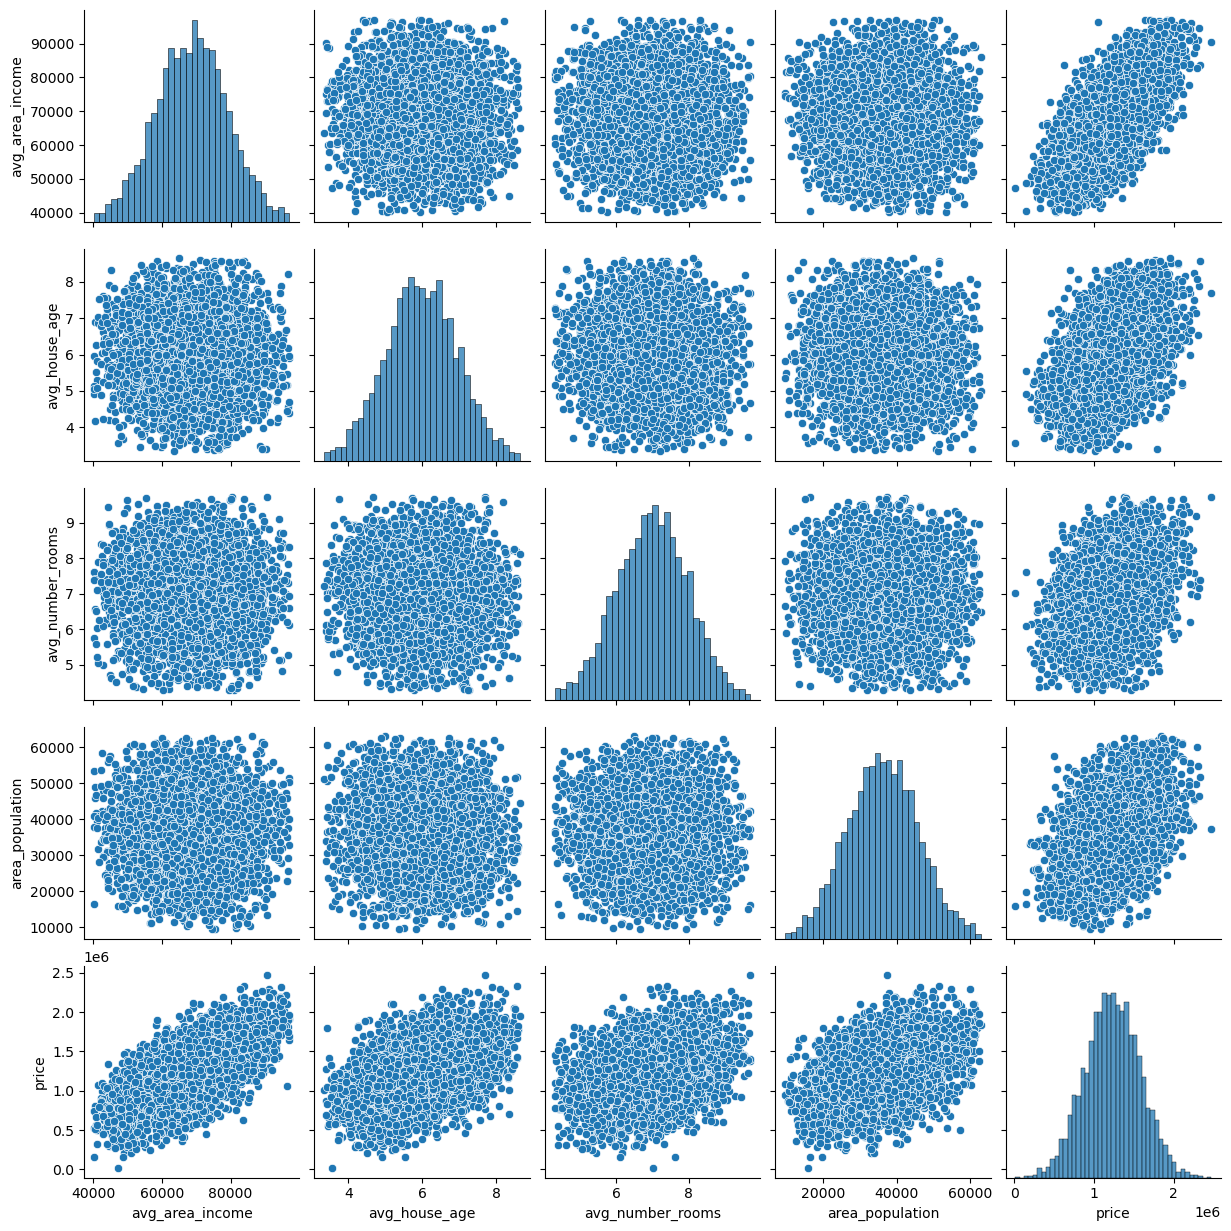

In [310]:
sns.pairplot(df_final)

In [312]:
df_final.corr(numeric_only=True)

,avg_area_income,avg_house_age,avg_number_rooms,area_population,price
avg_area_income,1.000000,-0.008514,-0.012746,-0.003024,0.640502
avg_house_age,-0.008514,1.000000,-0.011462,-0.015899,0.449399
avg_number_rooms,-0.012746,-0.011462,1.000000,0.002907,0.334272
area_population,-0.003024,-0.015899,0.002907,1.000000,0.412278
price,0.640502,0.449399,0.334272,0.412278,1.000000


In [314]:
df.corr(numeric_only=True)

,avg_area_income,avg_house_age,avg_number_rooms,avg_number_bedrooms,area_population,price
avg_area_income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
avg_house_age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
avg_number_rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
avg_number_bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
area_population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


##### Here is the code for the model using the cleaned `df_final` dataset after removing outliers and dropping the 'number_of_bedrooms' column due to multicollinearity:

In [318]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_final[['avg_area_income','avg_house_age','avg_number_rooms','area_population']]
y = df_final['price']

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101,shuffle=True)

In [324]:
model = LinearRegression()
linmodel = model.fit(X_train, y_train)

In [328]:
y_df_final_pred = linmodel.predict(X_test)

In [338]:
R2 = r2_score(y_test, y_df_final_pred)
print('R2 =', R2)
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
print('Adjusted R2 =', adj_r2)
MSE = mean_squared_error(y_test, y_df_final_pred)
print('MSE =', MSE)
RMSE = np.sqrt(MSE)
print("RMSE =",RMSE)
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_df_final_pred)
print('MAE =',MAE)

R2 = 0.9178047513908327
Adjusted R2 = 0.9174668469772287
MSE = 9900847145.188229
RMSE = 99503.00068434232
MAE = 79773.27007322492


##### This model is using our old dataset, which has not been cleaned:

In [342]:
X = df[['avg_area_income','avg_house_age','avg_number_bedrooms','avg_number_rooms','area_population']]
y = df['price']

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101,shuffle=True)

In [344]:
model = LinearRegression()
linmodel = model.fit(X_train, y_train)

In [346]:
y_df_pred = linmodel.predict(X_test)

In [348]:
R2 = r2_score(y_test, y_df_pred)
print('R2 =', R2)
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)
print('Adjusted R2 =', adj_r2)
MSE = mean_squared_error(y_test, y_df_pred)
print('MSE =', MSE)
RMSE = np.sqrt(MSE)
print("RMSE =",RMSE)
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_df_pred)
print('MAE =',MAE)

R2 = 0.9211719165401837
Adjusted R2 = 0.9207753970056776
MSE = 10100187858.869953
RMSE = 100499.6908396735
MAE = 81305.23300086727
